

# Project: Investigate a Dataset - [TMDb_Movies Dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset is a collection of data on over 10,000 movies obtained from The Movie Database (TMDB) database, it contains information such as: movie name, year of release, the budget used in producing the movie, revenue the movie generated etc.

### Column details
1.	original_title - The movies' title
2.	cast - The actors/actresses in the movie
3.	director - The Director of each movie in the dataset
4.	runtime - The total duration of the movie
5.	genres - The film category of each movie
6.	production_companies - The company/companies who produced the movie
7.	release_year - Year of release of the movie
8.	budget - Amount in USD used to produce the movie
9.	budget_adj - budget in terms of 2010 dollars, accounting for inflation over time
10.	revenue - Amount in USD the movie generated in sales
11.	revenue_adj - revenue in terms of 2010 dollars, accounting for inflation over time
12. vote_count - Number of votes for each movie
13. vote_average - Average rating of all votes per movie
15. Popularity - A rating of how popular each movie is
16. Revenue - Amount in USD the movie generated in sales
17 - net_profit - profit(revenue - budget) made on each movie

### Question(s) for Analysis

1. The most profitable movie genre year by year
2. Top 10 Most profitable movies and least profitable movies
3. Properties associated with high revenue movies
4. Top 20 Highest-grossing Actors on average


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read in the movies dataset and see the first five rows
df = pd.read_csv(r'C:\Users\abdul\tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling


In [4]:
# Lets load in data

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
df.shape

(10866, 21)

In [6]:
#Check for missing values 
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

We'll drop columns not needed before dealing with null values - This makes our dataset cleaner


In [7]:
df.drop(columns = ['imdb_id','homepage', 'keywords', 'tagline', 'overview', 'revenue_adj', 'budget_adj'], inplace = True)

In [8]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64


### Data Cleaning



**CLEANING STEPS**
 - Check for Duplicate rows - This is to avoid a wrong analysis
 - Check revenue and budget columns for values of 0 or NaN. Then delete affected rows to improve quality of analysis
 - Change date column to datetime - to enable time series analysis
 


In [9]:
#check for duplicate rows
df.duplicated().sum()

1

In [10]:
#we have one duplicate row so we delete it 
df.drop_duplicates(inplace=True)

In [11]:
#delete rows in revenue and budget with values of 0
del_list = ['revenue', 'budget']
df['revenue'].replace(0,np.NaN, inplace=True)
df['budget'].replace(0,np.NaN, inplace=True)
df.dropna(subset = del_list, inplace=True)
df.shape

(3854, 14)

In [12]:
#convert release date column to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
#confirm change
df.dtypes


id                               int64
popularity                     float64
budget                         float64
revenue                        float64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

In [14]:
#Create new column - net_profit - This is the profit each movie made
df['net_profit'] = df['revenue'] - df['budget']

In [15]:
df.shape

(3854, 15)

<a id='eda'></a>
## Exploratory Data Analysis



## Research Question 1: Most popular movie genre year by year 

In [16]:
# create a new dataframe copy 
df1 = df.copy()
# split the genres string
df1['genres'] = df1['genres'].str.split('|')
# create genre list
df1 = df1.explode('genres')

# groupby year then get highest genre popularity mean
df1genre = df1.groupby(['release_year','genres'])['popularity'].mean().groupby(level='release_year').nlargest(1)
df1genre.reset_index(level=0, drop=True,inplace =True)
# change the pandas series to pandas dataframe
df1genre = df1genre.to_frame()
df1genre.sort_values(by = 'release_year', ascending = False,inplace=True)
df1genre.reset_index(inplace=True)
df1genre

,release_year,genres,popularity
0,2015,Science Fiction,7.594638
1,2014,Science Fiction,5.482694
2,2013,Science Fiction,2.882717
3,2012,Western,5.944518
4,2011,Fantasy,1.977175
5,2010,Adventure,2.179113
6,2009,War,2.711016
7,2008,Animation,1.507001
8,2007,Fantasy,1.759555
9,2006,Animation,1.537277


We'd use a scatterplot to visualize the most popular genre from 1960 to 2015

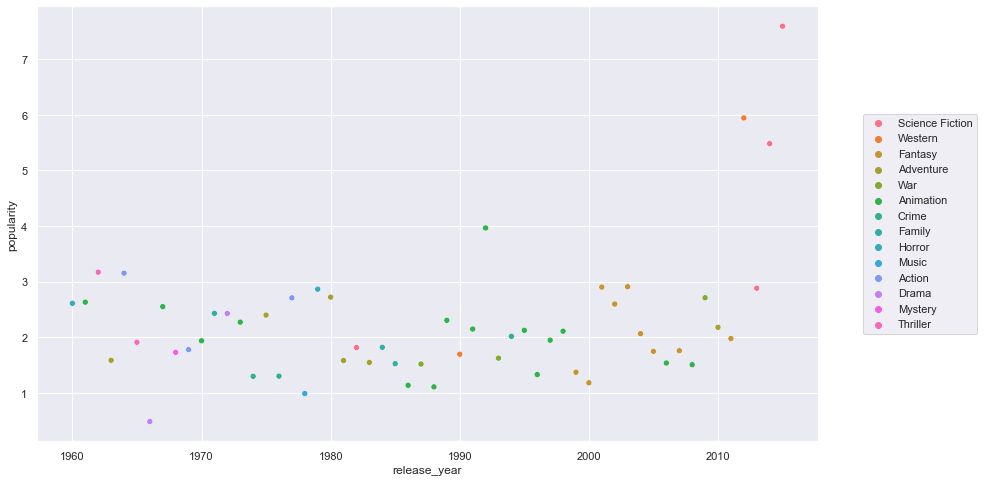

In [17]:
sns.set(rc={'figure.figsize':(14,8)})
g = sns.scatterplot( x = 'release_year', y ='popularity',hue = 'genres',data=df1genre)
g.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), ncol=1)
# df1genre.head()

## Research Question 2: (Top 10 Most profitable movies and least profitable movies)

In [18]:
dfTop10 = df[['original_title','net_profit']].sort_values(by = ['net_profit'], ascending = False)
dfBottom10 = df[['original_title','net_profit']].sort_values(by = ['net_profit'])
print('Top 10 most profitable movie are: ')
dfTop10.reset_index(inplace=True, drop=True)
dfTop10.head(10)


Top 10 most profitable movie are: 


,original_title,net_profit
0,Avatar,2.544506e+09
1,Star Wars: The Force Awakens,1.868178e+09
2,Titanic,1.645034e+09
3,Jurassic World,1.363529e+09
4,Furious 7,1.316249e+09
5,The Avengers,1.299558e+09
6,Harry Potter and the Deathly Hallows: Part 2,1.202818e+09
7,Avengers: Age of Ultron,1.125036e+09
8,Frozen,1.124219e+09
9,The Net,1.084280e+09


In [19]:
print('Top 10 least profitable movie are: ')
dfBottom10.reset_index(inplace=True, drop=True)
dfBottom10.head(10)

Top 10 least profitable movie are: 


,original_title,net_profit
0,The Warrior's Way,-413912431.0
1,The Lone Ranger,-165710090.0
2,The Alamo,-119180039.0
3,Mars Needs Moms,-111007242.0
4,Brother Bear,-99999750.0
5,The 13th Warrior,-98301101.0
6,The Adventures of Pluto Nash,-92896027.0
7,Charlotte's Web,-84999856.0
8,Flushed Away,-84540684.0
9,Australia,-80445998.0


## Research Question 3: (Properties associated with high revenue movies)




In [20]:
#Get dataset of movies that exceed the revenue mean
dfHighProfit  = df.query("revenue >= revenue.mean()")



In [21]:
#Find out the drivers for a profitable movie
dfHighProfit.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,net_profit
id,1.000000,0.295722,0.081874,0.066461,-0.027399,0.195760,0.066804,0.536118,0.053892
popularity,0.295722,1.000000,0.330363,0.523802,0.221878,0.705522,0.366846,0.223973,0.504879
budget,0.081874,0.330363,1.000000,0.574865,0.220509,0.464982,-0.044032,0.416614,0.391894
revenue,0.066461,0.523802,0.574865,1.000000,0.245532,0.687699,0.274220,0.178465,0.978083
runtime,-0.027399,0.221878,0.220509,0.245532,1.000000,0.317270,0.408555,-0.094665,0.219957
vote_count,0.195760,0.705522,0.464982,0.687699,0.317270,1.000000,0.498265,0.295727,0.654904
vote_average,0.066804,0.366846,-0.044032,0.274220,0.408555,0.498265,1.000000,-0.080610,0.319529
release_year,0.536118,0.223973,0.416614,0.178465,-0.094665,0.295727,-0.080610,1.000000,0.094646
net_profit,0.053892,0.504879,0.391894,0.978083,0.219957,0.654904,0.319529,0.094646,1.000000


From the correlation above, the following columns have strongest correlation to revenue:
    
    1 - popularity at 0.523802
    2 - budget at  0.574865
    3 - vote count at 0.687699	
    
    
We will make a scatter plot for each of these columns to display the correlation between each column and revenue

Text(0, 0.5, 'revenue')

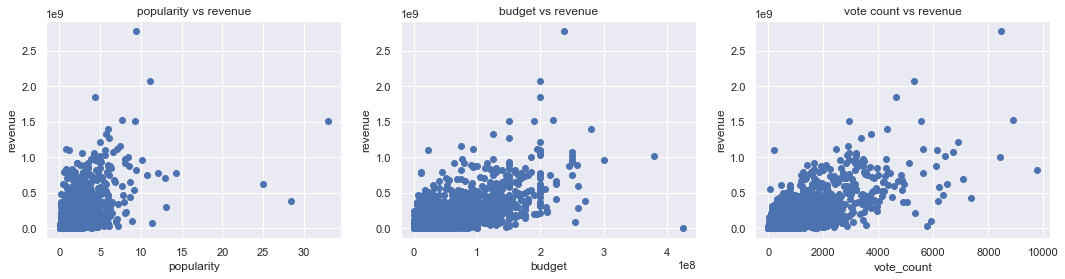

In [22]:
fig, ax = plt.subplots(2, 1, figsize=(18,4))
plt.subplot(1,3,1)
plt.scatter(x = 'popularity', y = 'revenue', data = df)
plt.title('popularity vs revenue')
plt.xlabel('popularity')
plt.ylabel('revenue')
plt.subplot(1,3,2)
plt.scatter(x = 'budget', y = 'revenue', data = df)
plt.title('budget vs revenue')
plt.xlabel('budget')
plt.ylabel('revenue')
plt.subplot(1,3,3)
plt.scatter(x = 'vote_count', y = 'revenue', data = df)
plt.title('vote count vs revenue')
plt.xlabel('vote_count')
plt.ylabel('revenue')


It's unexpected that 'vote count' is an indicator of high revenue. My take is vote count is related to the popularity (which itself is an indicator) of the movie. This is supported by the fact that the correlation between vote count and popularity is strong at 0.710509

## Research Question 4: (Top 20 Highest-grossing Actors on average)

For this analysis, we would only consider actors with at least 10 movies

In [23]:
# create a new dataframe copy 
df1 = df.copy()

# split the genres string
df1['cast'] = df1['cast'].str.split('|')
# create genre list
df1 = df1.explode('cast')

# groupby cast then get sum of revenue generated and count of movies starred
df1cast = df1.groupby(['cast'], as_index = False)['revenue'].mean()
df1castsum = df1.groupby(['cast'], as_index = False)['original_title'].count()

# merge the cast sum and count groupby dataframes
df1cast =df1cast.merge(df1castsum,how ='inner',on = 'cast')
df1cast.rename(columns = {"revenue": "average_revenue", "original_title":"original_titles"},inplace=True)
df1cast.sort_values(by ='average_revenue', ascending = False,inplace =True)
df1cast = df1cast.query('original_titles>=10')
df1cast.reset_index(drop=True,inplace = True)
top20 = df1cast.head(20)



In [24]:
top20

,cast,average_revenue,original_titles
0,Emma Watson,6.799371e+08,12
1,Daniel Radcliffe,6.552531e+08,12
2,Ian McKellen,5.769208e+08,14
3,Orlando Bloom,5.416361e+08,12
4,Michelle Rodriguez,4.515783e+08,12
5,Julie Andrews,3.666346e+08,10
6,Chris Hemsworth,3.604209e+08,13
7,Jennifer Lawrence,3.510970e+08,11
8,Shia LaBeouf,3.504163e+08,13
9,Mike Myers,3.475385e+08,11


We use a horizontal bar chart to display the actors with the highest-grossing actors on average since the cast are categorical data.

Text(0.5, 1.0, 'Top 20 Highest-grossing Actors')

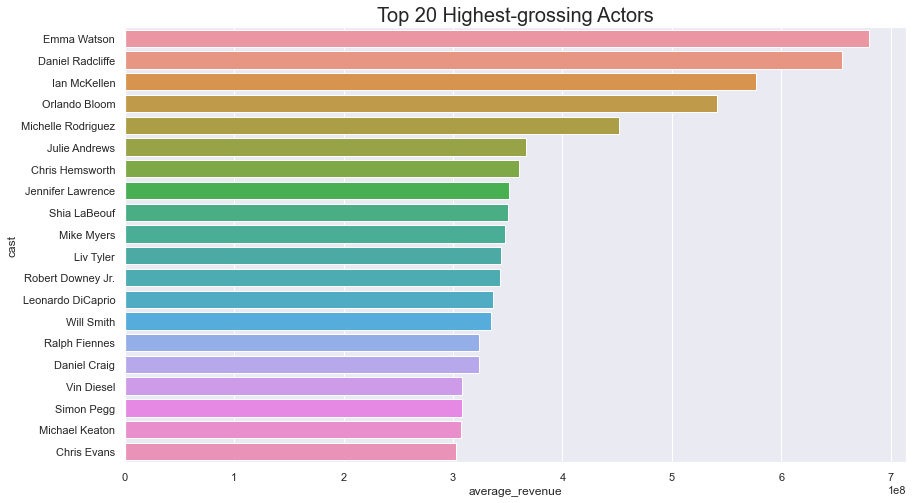

In [25]:
#Visualize the amount
g= sns.barplot(x='average_revenue', y='cast', data = top20)
g.set_title('Top 20 Highest-grossing Actors',fontdict = { 'fontsize': 20})

<a id='conclusions'></a>
## Conclusion
From the analysis, we see that movies with high revenue have high budget, high popularity and high vote count. Also, we showed that science fiction has become the most popular movie genre in recent years by a large margin. Therefore a production movie house looking to produce a movie that will generate a high revenue should invest in a high budget science fiction movie and choose actors whose movies generate a high amount of revenue. 
## Limitations

     1 - The amount of null values in the budget and revenue columns of the given dataset is 7012 out of 10866 data points. That's 64.5% of the dataset whose rows weren't useful.

     2 - It isn't clear how the vote count and vote average columns were brought about.  



In [253]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'MoviesDataAnalysis.ipynb'])

1